In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
#importing data set
cars = pd.read_csv('Car_dataset.csv')
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [124]:
# copying the dataset
data = cars.copy(deep=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [125]:
#checking null values
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [126]:
# unique values
for x in data.columns:
    if data[x].dtype == 'object':
        
        print('Variable Name: ',data[x].name,'\n',pd.unique(data[x]))
        print(data[x].value_counts(),'\n')

Variable Name:  name 
 ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64 

Variable Name:  fuel 
 ['Diesel' 'Petrol' 'LPG' 'CNG']
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name:

Since torque variable has multiple units , it is neglected

In [127]:
# dropping the unwanted variables
data.drop(['torque'],axis=1,inplace=True)

In [128]:
# inferencial statistics
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


##### From above statistics, it is clear that 
1. price variable is not uniformly distributed
2. Seats variable doesnot make any sense

In [129]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [154]:
x = []
for i in data.name:
    x.append(' '.join(i.split(' ')[:2]))
data['name'] = x

In [155]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [170]:
Name = pd.crosstab(data.name,'count').sort_values(by='count',ascending=False)
Name.count>1

TypeError: '>' not supported between instances of 'method' and 'int'

In [109]:
# creating function to visualize the continuous variable
def visualize_conti():
    variables = ['kilometer','powerPS']
    for var in variables:
        fig, axes = plt.subplots(1,3,figsize=(12,3))
        print('Variable:',var)
        axes[0].set_title('Distribution')
        sns.histplot(data[var],ax=axes[0])
        axes[1].set_title('Checking Outliers')
        sns.boxplot(data[var],ax=axes[1])
        axes[2].set_title('Relation with price')
        sns.scatterplot(data[var],data.price,ax=axes[2])
        plt.show()
    
# creating function to visualize the categorical variable
def visualize_cato():
    variables = ['vehicleType','gearbox','fuelType','brand','notRepairedDamage']
    for var in variables:
        fig, axes = plt.subplots(1,2,figsize=(12,3))
        print('Variable:',var)
        axes[0].set_title('Count')
        sns.countplot(data[var],ax=axes[0])

        axes[1].set_title('Relation with price')
        sns.boxplot(data[var],data.price,ax=axes[1])
        for ax in fig.axes:
            ax.tick_params(axis='x', rotation=90)
        plt.show()

Variable: kilometer


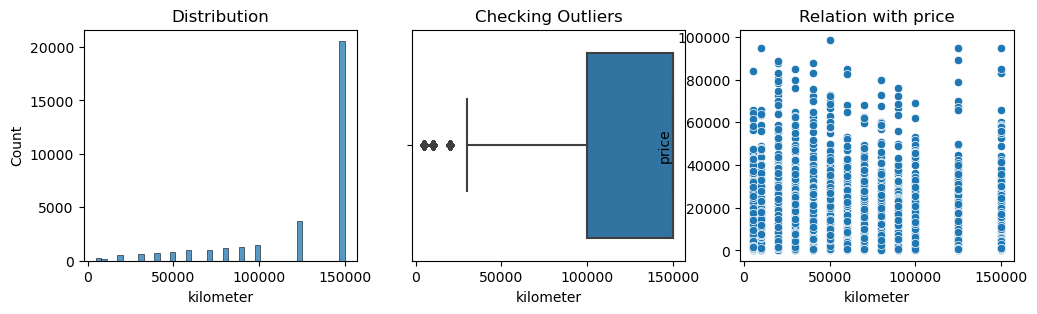

Variable: powerPS


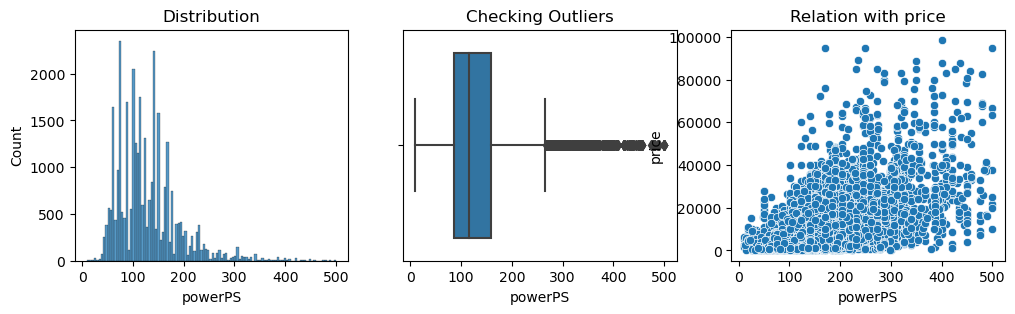

In [108]:
visualize_conti()

Variable: vehicleType


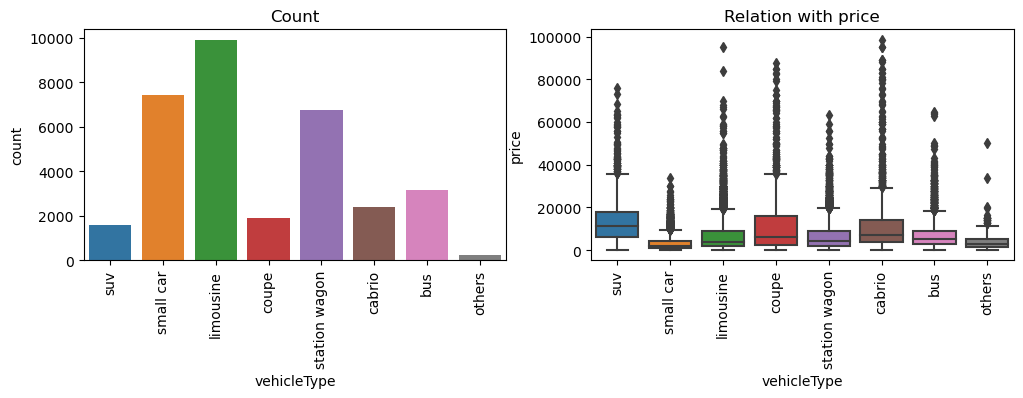

Variable: gearbox


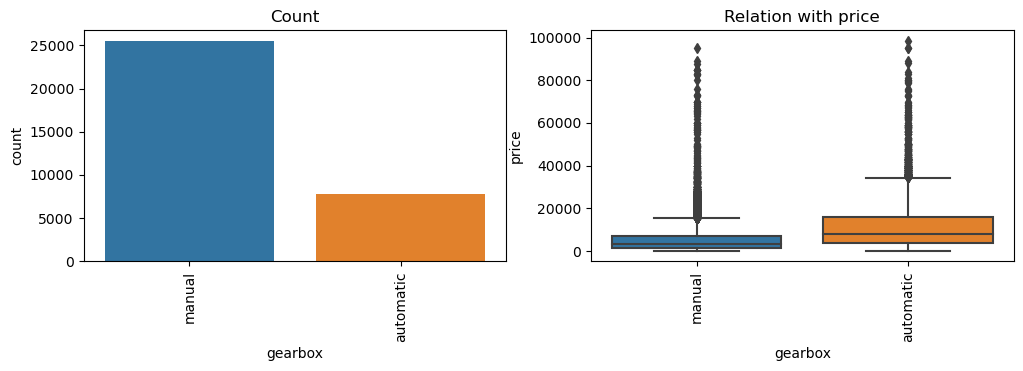

Variable: fuelType


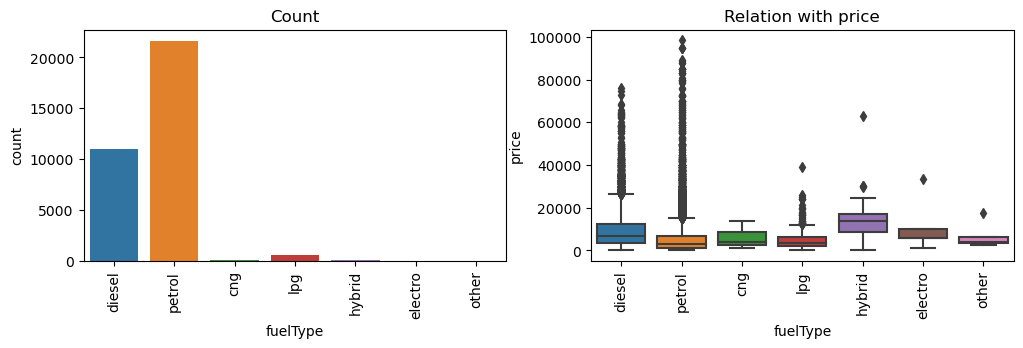

Variable: brand


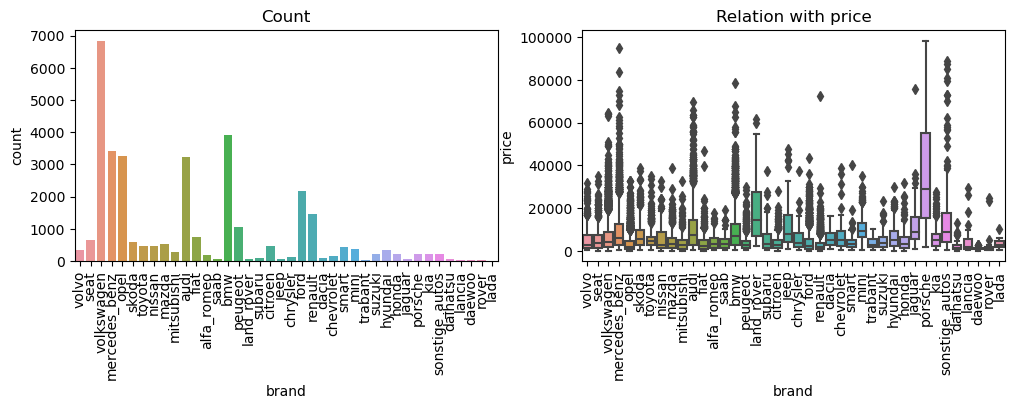

Variable: notRepairedDamage


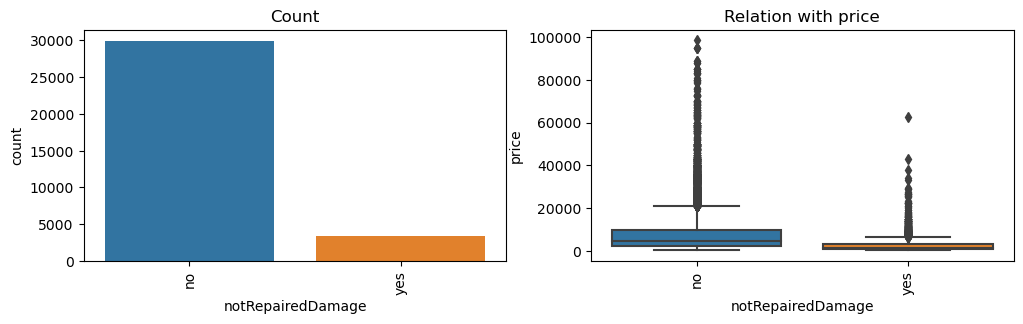

In [110]:
visualize_cato()

Variable: Price


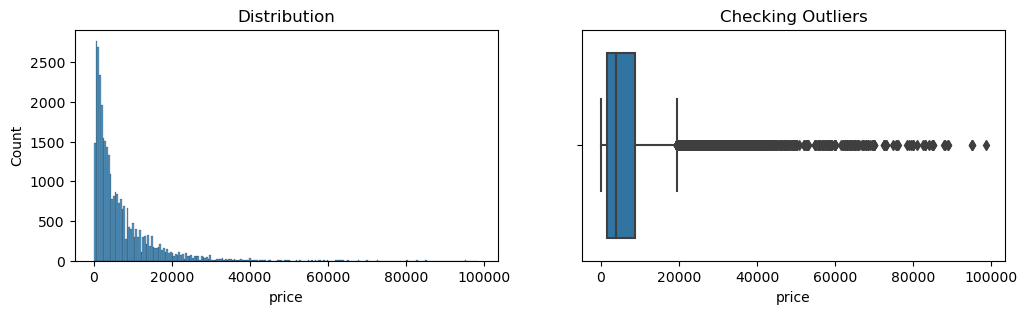

In [111]:
# visualizing output variable
print('Variable: Price')
fig, axes = plt.subplots(1,2,figsize=(12,3))
axes[0].set_title('Distribution')
sns.histplot(data.price,ax=axes[0])
axes[1].set_title('Checking Outliers')
sns.boxplot(data.price,ax=axes[1])
plt.show()

In [112]:
# dropping all the NaN values
data = data.dropna().reset_index(drop='first')

In [113]:
#deleting duplicate records
data.drop_duplicates(inplace=True)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33305 entries, 0 to 33304
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                33305 non-null  int64 
 1   vehicleType          33305 non-null  object
 2   yearOfRegistration   33305 non-null  int64 
 3   gearbox              33305 non-null  object
 4   powerPS              33305 non-null  int64 
 5   kilometer            33305 non-null  int64 
 6   monthOfRegistration  33305 non-null  int64 
 7   fuelType             33305 non-null  object
 8   brand                33305 non-null  object
 9   notRepairedDamage    33305 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.8+ MB


In [115]:
# checking how many records have price as more than 100000
len(data[data.price>100000])

0

Only 47 records have price as more than 100000

In [116]:
# checking how many records have price as more than 100
len(data[data.price<100])

0

In [117]:
# fixing the range of values for few features
data = data[(data.yearOfRegistration >= 1970) &
           (data.yearOfRegistration <= 2018) &
           (data.price >= 100) &
           (data.price <= 100000) &
           (data.powerPS >= 10) &
           (data.powerPS <= 500)]
data.reset_index(drop='first')

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,13299,suv,2005,manual,163,150000,6,diesel,volvo,no
1,4500,small car,2006,manual,86,60000,12,petrol,seat,no
2,18750,suv,2008,automatic,185,150000,11,diesel,volvo,no
3,988,limousine,1995,manual,90,150000,2,petrol,volkswagen,no
4,1399,coupe,1997,manual,136,150000,11,petrol,mercedes_benz,no
...,...,...,...,...,...,...,...,...,...,...
33300,990,limousine,1999,manual,136,150000,2,petrol,opel,no
33301,10900,limousine,2004,manual,231,150000,8,petrol,bmw,no
33302,790,limousine,1998,manual,82,150000,9,diesel,opel,no
33303,830,small car,1999,manual,60,125000,8,petrol,renault,no


Variable: kilometer


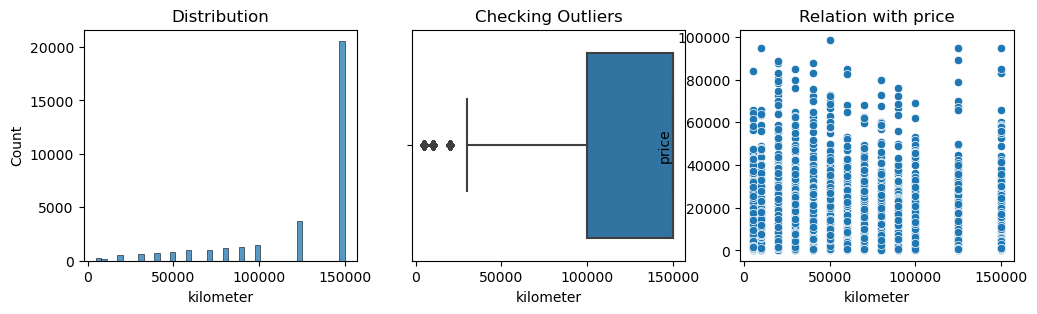

Variable: powerPS


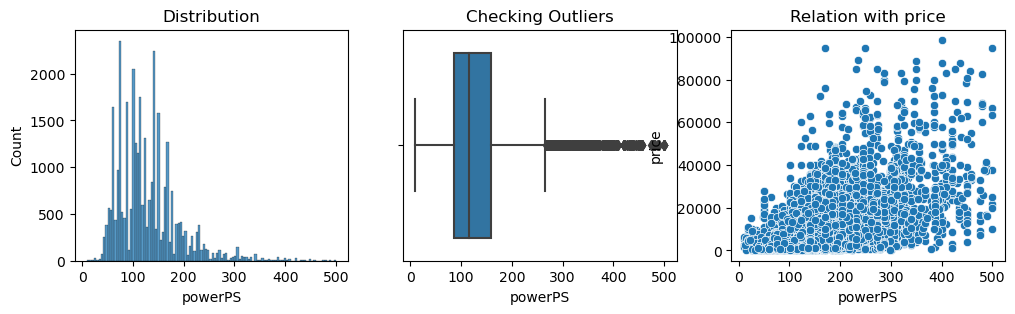

In [119]:
# visualizing the continuous variable
visualize_conti()

Variable: vehicleType


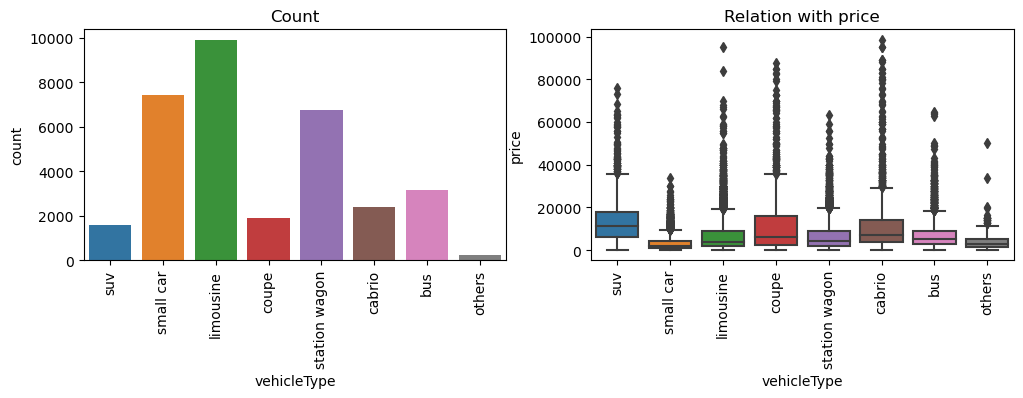

Variable: gearbox


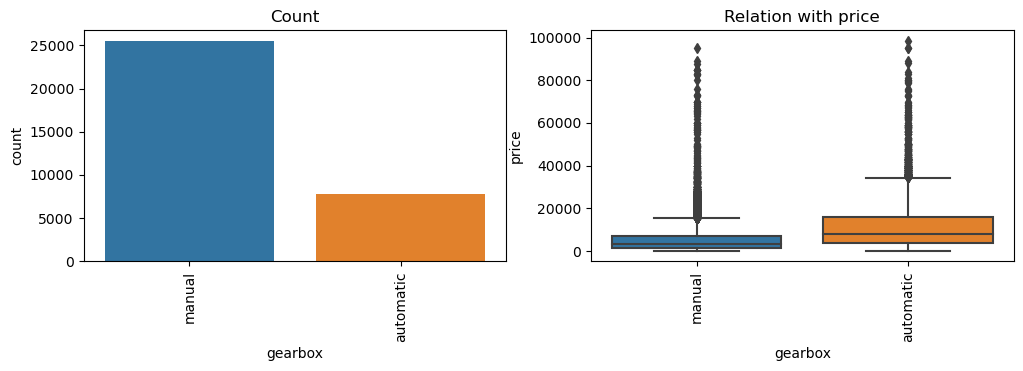

Variable: fuelType


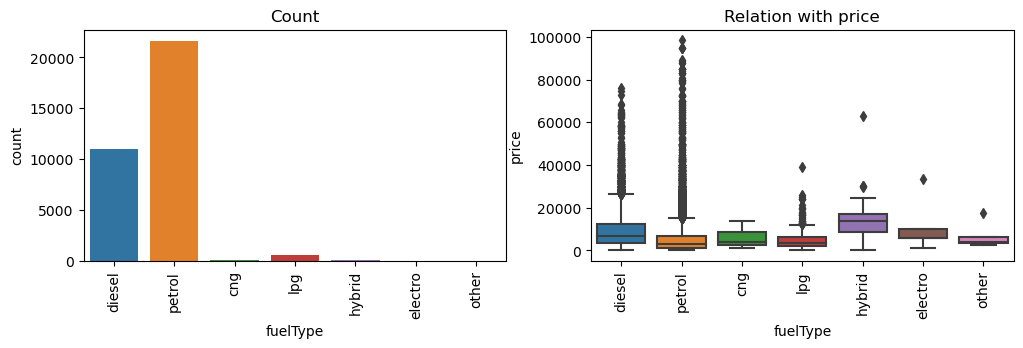

Variable: brand


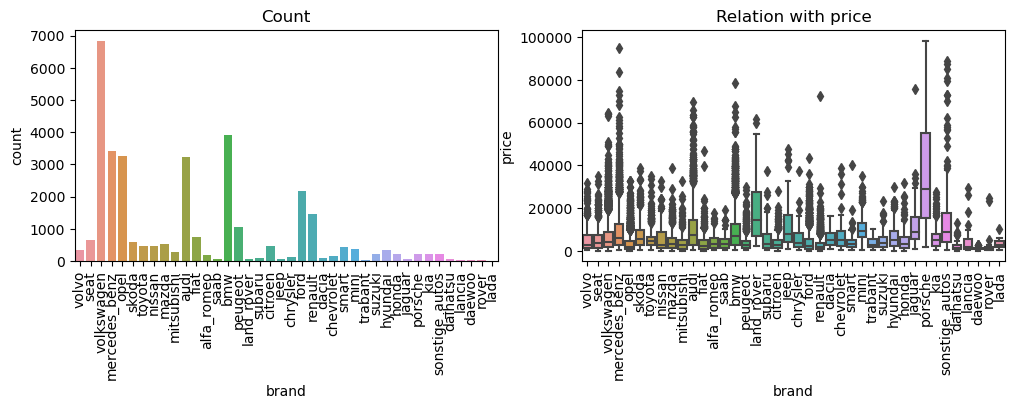

Variable: notRepairedDamage


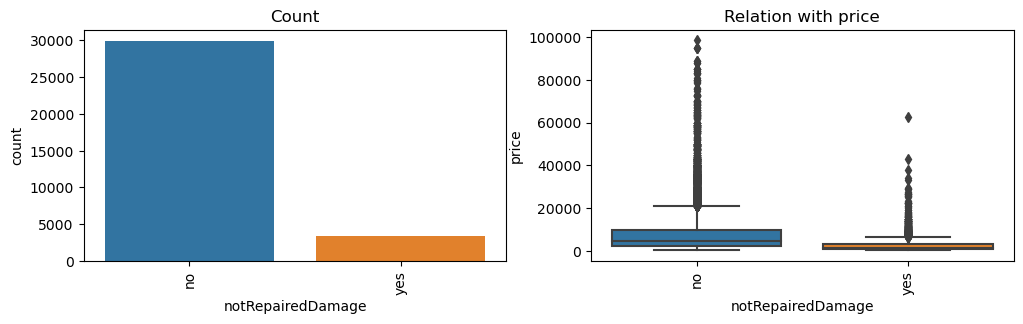

In [120]:
# visualizing categocal variables
visualize_cato()

Variable: Price


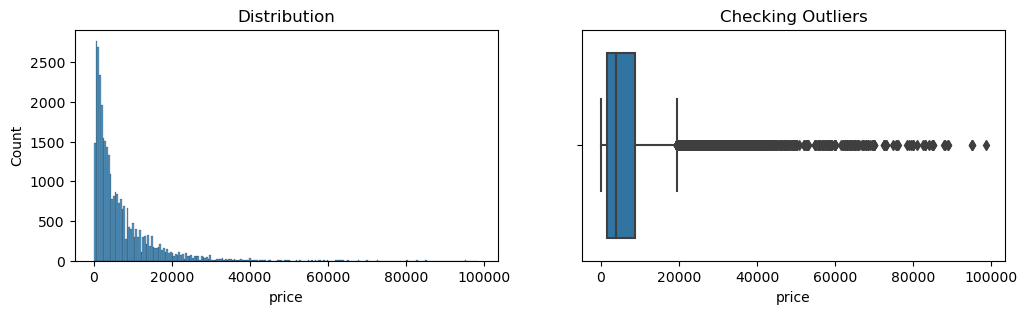

In [99]:
# visualizing output variable
print('Variable: Price')
fig, axes = plt.subplots(1,2,figsize=(12,3))
axes[0].set_title('Distribution')
sns.histplot(data.price,ax=axes[0])
axes[1].set_title('Checking Outliers')
sns.boxplot(data.price,ax=axes[1])
plt.show()

In [121]:
#creating new column 'AGE'
from datetime import datetime
data['age'] = round((datetime.now().year - data.yearOfRegistration) + ((datetime.now().month - data.monthOfRegistration)/12),2)

In [17]:
# dropping the columns
data.drop(['yearOfRegistration','monthOfRegistration'],axis=1,inplace=True)

In [18]:
# checking corelation between the variables
data.corr()

,price,powerPS,kilometer,age
price,1.000000,0.591347,-0.468286,-0.502157
powerPS,0.591347,1.000000,-0.012022,-0.211237
kilometer,-0.468286,-0.012022,1.000000,0.433153
age,-0.502157,-0.211237,0.433153,1.000000


In [19]:
#encoding the label
from sklearn.preprocessing import LabelEncoder

In [20]:
# encoding vehicle type variable
encod_type = LabelEncoder()
data.vehicleType = encod_type.fit_transform(data.vehicleType)

pd.DataFrame(zip(encod_type.classes_,encod_type.transform(encod_type.classes_)),columns=['vehicleType','encoded'])

,vehicleType,encoded
0,bus,0
1,cabrio,1
2,coupe,2
3,limousine,3
4,others,4
5,small car,5
6,station wagon,6
7,suv,7


In [21]:
# encoding Gearbox variable
encod_gear = LabelEncoder()
data.gearbox = encod_gear.fit_transform(data.gearbox)

pd.DataFrame(zip(encod_gear.classes_,encod_gear.transform(encod_gear.classes_)),columns=['gearbox','encoded'])

,gearbox,encoded
0,automatic,0
1,manual,1


In [22]:
# encoding fuel type varianle
encod_fuel = LabelEncoder()
data.fuelType = encod_fuel.fit_transform(data.fuelType)

pd.DataFrame(zip(encod_fuel.classes_,encod_fuel.transform(encod_fuel.classes_)),columns=['fuel_type','encoded'])

,fuel_type,encoded
0,cng,0
1,diesel,1
2,electro,2
3,hybrid,3
4,lpg,4
5,other,5
6,petrol,6


In [23]:
# Encoding brand variable
encod_brand = LabelEncoder()
data.brand = encod_brand.fit_transform(data.brand)

pd.DataFrame(zip(encod_brand.classes_,encod_brand.transform(encod_brand.classes_)),columns=['brand','encoded'])

,brand,encoded
0,alfa_romeo,0
1,audi,1
2,bmw,2
3,chevrolet,3
4,chrysler,4
5,citroen,5
6,dacia,6
7,daewoo,7
8,daihatsu,8
9,fiat,9


In [24]:
# encoding repair variable
encod_repair = LabelEncoder()
data.notRepairedDamage = encod_repair.fit_transform(data.notRepairedDamage)

pd.DataFrame(zip(encod_repair.classes_,encod_repair.transform(encod_repair.classes_)),columns=['Repair','encoded'])

,Repair,encoded
0,no,0
1,yes,1


In [25]:
# exporting all the encoders
import pickle
pickle.dump(encod_type,open('pickle_files/vehicle_type.pkl','wb'))
pickle.dump(encod_gear,open('pickle_files/gearbox.pkl','wb'))
pickle.dump(encod_fuel,open('pickle_files/fuel_type.pkl','wb'))
pickle.dump(encod_brand,open('pickle_files/brand.pkl','wb'))
pickle.dump(encod_repair,open('pickle_files/repair.pkl','wb'))

In [26]:
# dataset after encoding
data.head()

,price,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,age
0,13299,7,1,163,150000,1,39,0,16.17
1,4500,5,1,86,60000,6,30,0,14.67
2,18750,7,0,185,150000,1,39,0,12.75
3,988,3,1,90,150000,6,38,0,26.50
4,1399,2,1,136,150000,6,20,0,23.75


In [27]:
#splitting data into input and output
x = data.drop('price',axis=1)
y = data.price

In [28]:
# output variable 'price' is log transformed 
y1 = np.log(y)

In [29]:
#scaling the input data
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

x1 = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x1

,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,age
0,1.000000,1.0,0.312245,1.000000,0.166667,1.000000,0.0,0.266832
1,0.714286,1.0,0.155102,0.379310,1.000000,0.769231,0.0,0.235853
2,1.000000,0.0,0.357143,1.000000,0.166667,1.000000,0.0,0.196200
3,0.428571,1.0,0.163265,1.000000,1.000000,0.974359,0.0,0.480173
4,0.285714,1.0,0.257143,1.000000,1.000000,0.512821,0.0,0.423379
...,...,...,...,...,...,...,...,...
33300,0.428571,1.0,0.257143,1.000000,1.000000,0.615385,0.0,0.397563
33301,0.428571,1.0,0.451020,1.000000,1.000000,0.051282,0.0,0.283974
33302,0.428571,1.0,0.146939,1.000000,0.166667,0.615385,0.0,0.406237
33303,0.714286,1.0,0.102041,0.827586,1.000000,0.692308,0.0,0.387237


In [30]:
# exporting the scalar function
import pickle
pickle_out = open('pickle_files/scalar.pkl','wb')
pickle.dump(scalar,pickle_out)
pickle_out.close()

In [31]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=1)

print('Shape of Spliting')
print(f'x_train={x_train.shape}, y_train={y_train.shape}, x_test={x_test.shape}, y_test={y_test.shape}')

Shape of Spliting
x_train=(26644, 8), y_train=(26644,), x_test=(6661, 8), y_test=(6661,)


## Building Model

In [32]:
# importing neccesary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# initializing the linear regression
lin = LinearRegression()

In [33]:
def get_results(model):
    # fitting on train and predicting for test data
    pred = model.fit(x_train,y_train).predict(x_test)
    
    #calculate RMSE
    RMSE = np.sqrt(mean_squared_error(y_test,pred))
    
    #calculate r2 score
    r2 = r2_score(y_test,pred)
    
    # printing the results
    print('RMSE = {}, r2_score = {}'.format(RMSE,r2))
    
    return RMSE, r2

In [34]:
# getting the results for linear regression algorithm
RMSE_lin, r2_lin = get_results(lin)

RMSE = 0.6078732344839062, r2_score = 0.7086839655264587
